In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

In [2]:
# loading data set
data= pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
data.shape

(768, 9)

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
0 ----> Non-diabetic
1 ----> diabetic

SyntaxError: invalid syntax (1225560822.py, line 1)

In [9]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
data['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [11]:
import matplotlib.pyplot as plt

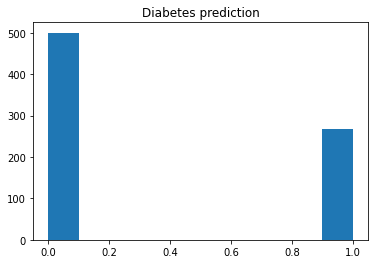

In [12]:
plt.hist(x = "Outcome",data=data)
plt.title("Diabetes prediction")
plt.show()

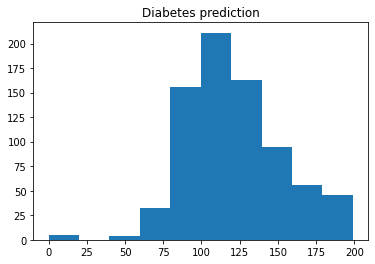

In [13]:
plt.hist(x = "Glucose",data=data)
plt.title("Diabetes prediction")
plt.show()

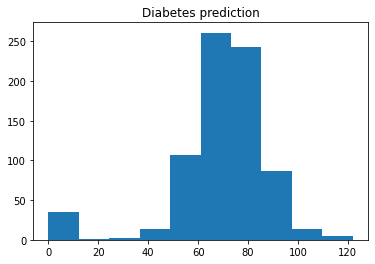

In [14]:
plt.hist(x = "BloodPressure",data=data)
plt.title("Diabetes prediction")
plt.show()

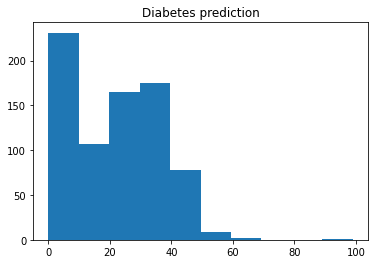

In [15]:
plt.hist(x = "SkinThickness",data=data)
plt.title("Diabetes prediction")
plt.show()

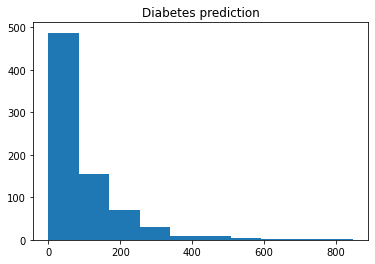

In [16]:
plt.hist(x = "Insulin",data=data)
plt.title("Diabetes prediction")
plt.show()

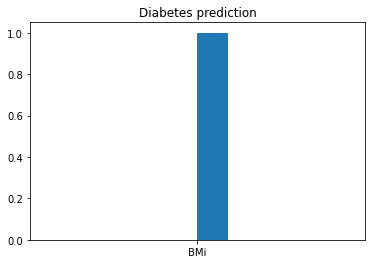

In [17]:
plt.hist(x = "BMi",data=data)
plt.title("Diabetes prediction")
plt.show()

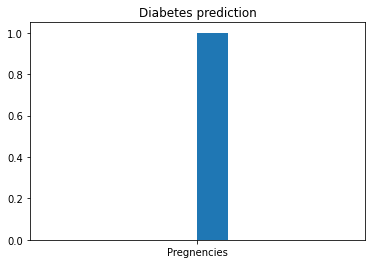

In [18]:
plt.hist(x = "Pregnencies",data=data)
plt.title("Diabetes prediction")
plt.show()

In [21]:
import seaborn as sns

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

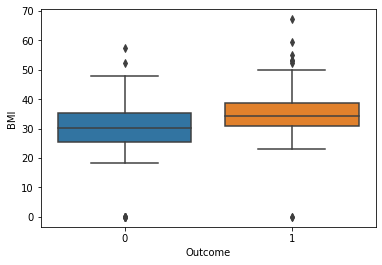

In [22]:
sns.boxplot(y='BMI',x='Outcome',data=data)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

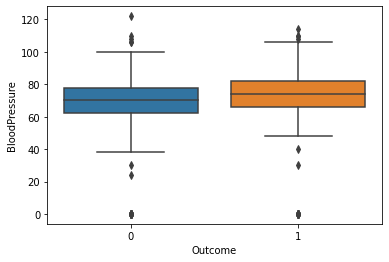

In [23]:
sns.boxplot(y='BloodPressure',x='Outcome',data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

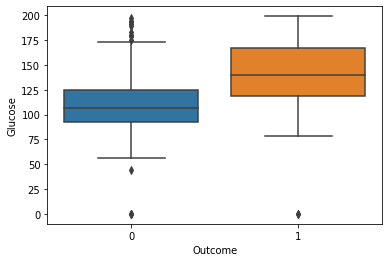

In [24]:
sns.boxplot(y='Glucose',x='Outcome',data=data)

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

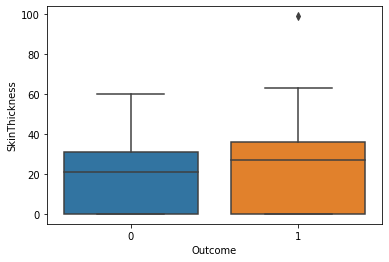

In [25]:
sns.boxplot(y='SkinThickness',x='Outcome',data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

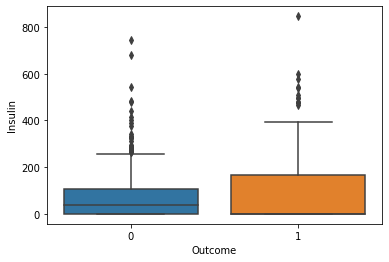

In [26]:
sns.boxplot(y='Insulin',x='Outcome',data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

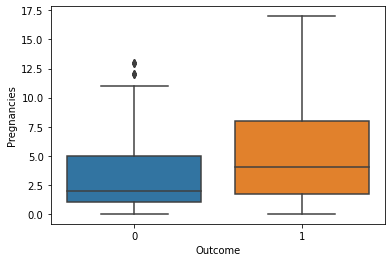

In [27]:
sns.boxplot(y='Pregnancies',x='Outcome',data=data)

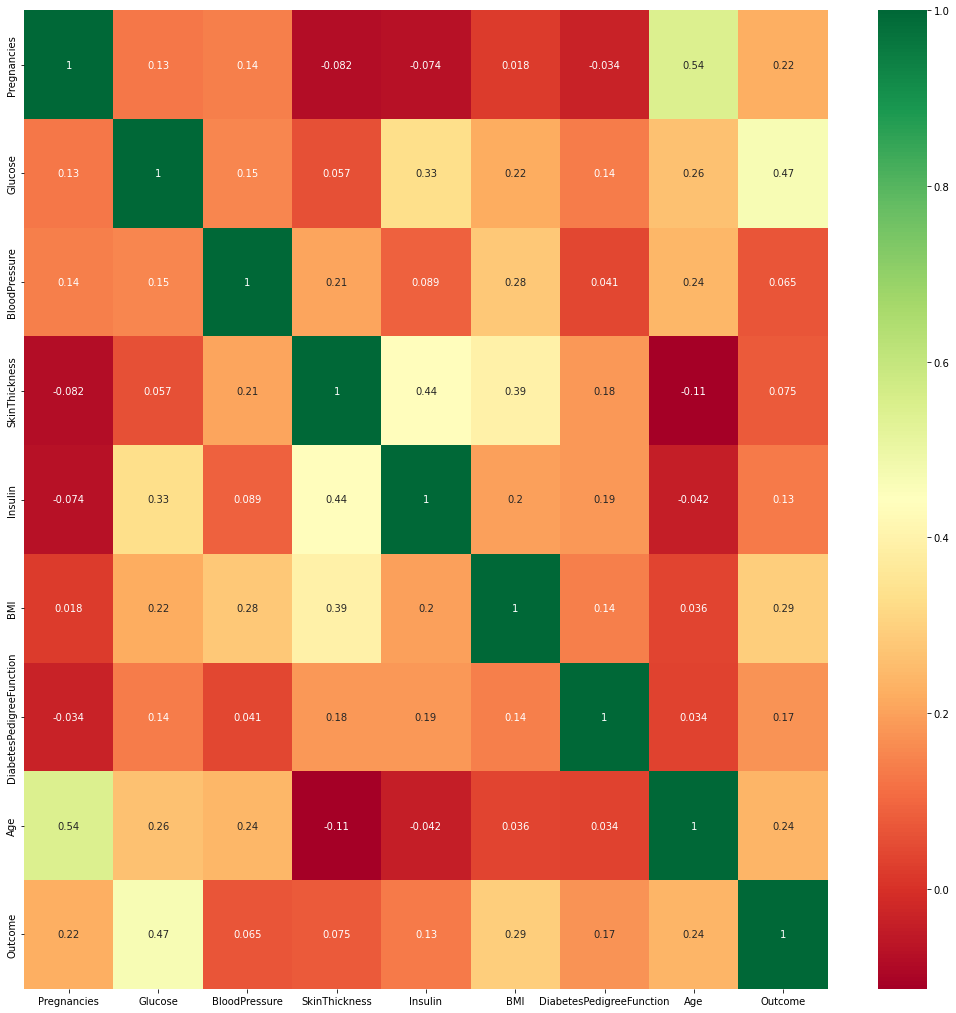

In [28]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [29]:
## sepearating the data and labels
X = data.drop(columns = 'Outcome',axis = 1)
Y = data['Outcome']

In [30]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [31]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [32]:
## Data standaraization
scaler = StandardScaler()

In [33]:
scaler.fit(X)

StandardScaler()

In [34]:
standardized_data = scaler.transform(X)

In [35]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [36]:
X = standardized_data
Y = data['Outcome']

In [37]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [38]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [39]:
##Train Test Split
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,stratify= Y,random_state= 2)
print(X.shape, X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [41]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [42]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [43]:
print('Accuracy score of training data :',training_data_accuracy)

Accuracy score of training data : 0.7850162866449512


In [46]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction ,Y_test)

In [47]:
print('Accuracy score of test data :',test_data_accuracy)

Accuracy score of test data : 0.7597402597402597


In [52]:
## making a predictive System
input_data = (1,85,66,29,0,26.6,0.351,31)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#standardize the input data
prediction = model.predict(input_data_reshaped)
print(prediction)

prediction = model.predict(input_data_reshaped)
print(prediction)


[1]
[1]


In [53]:
if (prediction[0] ==1):
    print("The person is not diabetic")
else:
    print("The person is diabetic")

The person is not diabetic


In [58]:
import joblib

In [59]:
lr = LogisticRegression()

In [62]:
joblib.dump(lr,'diabetes_prediction')

['diabetes_prediction']

In [63]:
model = joblib.load('diabetes_prediction')

In [65]:
import pandas as pd
df = pd.DataFrame({
    'Pregnencies':1,
    'Glucose':85,
    'BloodPressure':66,
    'SkinThickness':29,
    'Insulin':0,
    'BMi':26.6,
    'Diabetespedegreefunction':0.351,
    'age':31
},index=[0])

In [66]:
df

,Pregnencies,Glucose,BloodPressure,SkinThickness,Insulin,BMi,Diabetespedegreefunction,age
0,1,85,66,29,0,26.6,0.351,31


In [67]:
from tkinter import *

In [69]:
def show_entry_fields():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    
    model = joblib.load('diabetes_prediction')
    result = model.predict([[p1,p2,p3,p4,p5,p6,p7]])
    
    Label(master, text="diabetes prediction").grid(row=8)
    Label(master, text=result).grid(row=9)
    
master =Tk()
master.title("diabetes prediction")
label = Label(master,text = "diabetes prediction",bg = "black",fg="white").grid(row=0,columnspan=2)

Label(master, text = "Pregencies").grid(row=1)
Label(master, text = "Glucose").grid(row=2)
Label(master, text = "BloodPressure").grid(row=3)
Label(master, text = "SkinThickness").grid(row=4)
Label(master, text = "Insulin").grid(row=5)
Label(master, text = "BMi").grid(row=6)
Label(master, text = "Diabetespedgreefunction").grid(row=7)
Label(master, text = "Age").grid(row=8)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)

Button(master,text='predict',command=show_entry_fields).grid()

mainloop()